# House Price Prediction Regression Project

# Project Goal

## Load Modules / Libraries

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [14]:
train_data_path = r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\train.csv"
test_data_path = r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\test.csv"



df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)


print("Shape of df_train:",df_train.shape)
print("Shape of df_test:",df_test.shape)



Shape of df_train: (1460, 81)
Shape of df_test: (1459, 80)


In [22]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [26]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Known Your Data

## Data Integration

In [87]:
train_data_path = r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\train.csv"
test_data_path = r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)
df = pd.concat([df_train, df_test])


print("Shape of Integrated Data/DF : ",df.shape)

Shape of Integrated Data/DF :  (2919, 81)


In [89]:
df.head (5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [98]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Get The Brief Information of Dataset 

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [123]:
int_features = df.select_dtypes(include =["int64"]).columns
print("Total number of integer features :",int_features.shape[0])
print("Integer feature names:",int_features.tolist())

Total number of integer features : 26
Integer feature names: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [133]:
float_features = df.select_dtypes(include =["float64"]).columns
print("Total number of float features :",float_features.shape[0])
print("Float feature names:",float_features.tolist())

Total number of float features : 12
Float feature names: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [141]:
object_features = df.select_dtypes(include =["object"]).columns
print("Total number of object features :",object_features.shape[0])
print("Object feature names:",object_features.tolist())

Total number of object features : 43
Object feature names: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the Statistical Inforamtion of Numerical Features 

In [148]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [146]:
df.describe().shape

(8, 38)

## Handling Missing Value


## Visualise null/Missing Value

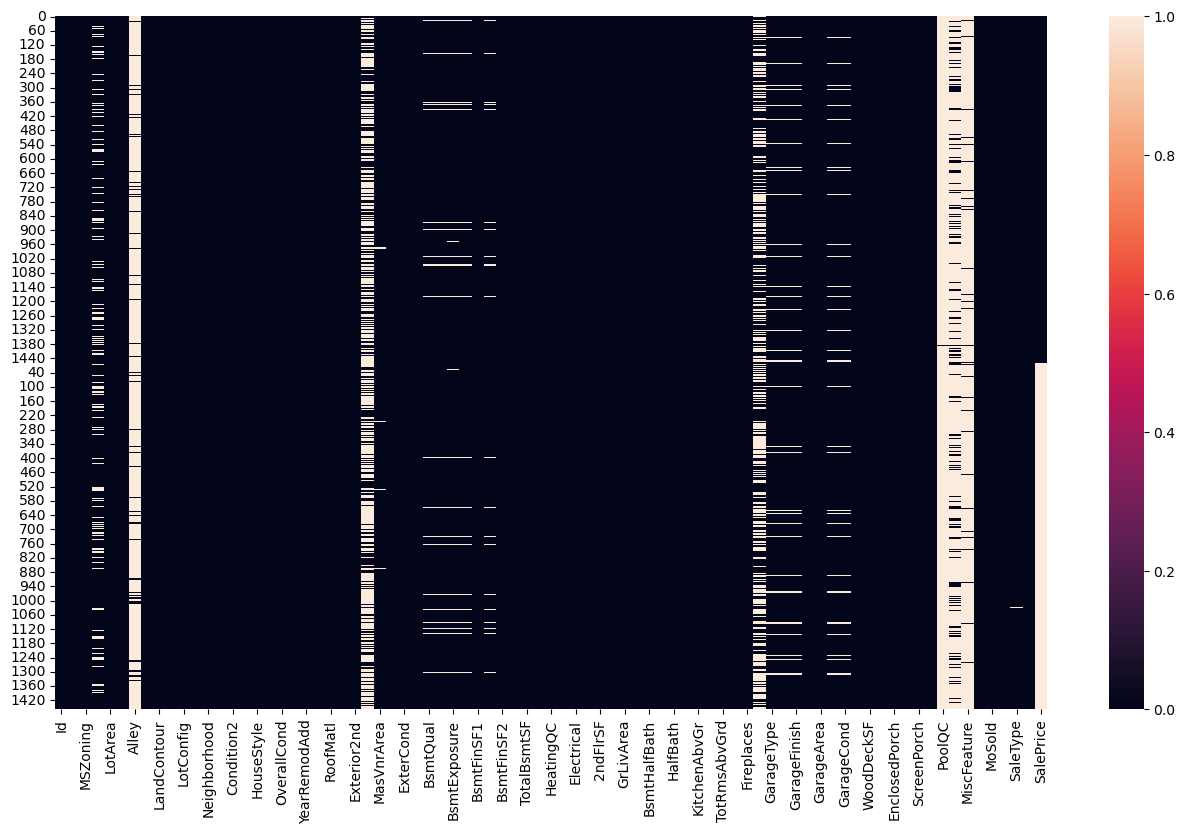

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

In [ ]:
# Set index as ID column
df = df.set_index("ID")

In [164]:
null_count = df.isnull().sum()
null_count

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [168]:
null_percent = df.isnull().sum()/df.shape[0] *100
null_percent


Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 81, dtype: float64

## Drop Columns/Features 

In [49]:
# null_count = df.isnull().sum()
# null_count

# df = df.set_index("yyyID")
import pandas as pd
# train_data_path = r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\train.csv"
# test_data_path = r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\test.csv"

# df = pd.read_csv('C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\.csv')
train_data_path = r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\train.csv"
test_data_path = r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\test.csv"



df = pd.read_csv(train_data_path)
df = pd.read_csv(test_data_path)



# null_percent = df.isnull().sum()/df.shape[0] *100
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Alley          92.666210
MasVnrType     61.274846
FireplaceQu    50.034270
PoolQC         99.794380
Fence          80.123372
MiscFeature    96.504455
dtype: float64

In [47]:
df["Alley"].value_counts()

Alley
Grvl    70
Pave    37
Name: count, dtype: int64

In [51]:
"""As per Domain knowledge we will not drop FireplaceQ features,instead None value we will add constant value 'NA '"""


train_data_path = r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\train.csv"
test_data_path = r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\test.csv"



df = pd.read_csv(train_data_path)
df = pd.read_csv(test_data_path)





# null_percent = df.isnull().sum()/df.shape[0] *100
miss_value_20_50_perc=null_percent[(null_percent >20)&(null_percent < 51)]
miss_value_20_50_perc

FireplaceQu    50.03427
dtype: float64

In [53]:
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 21)]
miss_value_5_20_perc

LotFrontage     15.558602
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
dtype: float64

In [70]:
for i in df.columns:
    print(i +"\t"+ str(len(df[i].unique())))

Id	1459
MSSubClass	16
MSZoning	6
LotFrontage	116
LotArea	1106
Street	2
Alley	3
LotShape	4
LandContour	4
Utilities	2
LotConfig	5
LandSlope	3
Neighborhood	25
Condition1	9
Condition2	5
BldgType	5
HouseStyle	7
OverallQual	10
OverallCond	9
YearBuilt	106
YearRemodAdd	61
RoofStyle	6
RoofMatl	4
Exterior1st	14
Exterior2nd	16
MasVnrType	4
MasVnrArea	304
ExterQual	4
ExterCond	5
Foundation	6
BsmtQual	5
BsmtCond	5
BsmtExposure	5
BsmtFinType1	7
BsmtFinSF1	670
BsmtFinType2	7
BsmtFinSF2	162
BsmtUnfSF	794
TotalBsmtSF	737
Heating	4
HeatingQC	5
CentralAir	2
Electrical	4
1stFlrSF	789
2ndFlrSF	407
LowQualFinSF	15
GrLivArea	879
BsmtFullBath	5
BsmtHalfBath	4
FullBath	5
HalfBath	3
BedroomAbvGr	7
KitchenAbvGr	3
KitchenQual	5
TotRmsAbvGrd	12
Functional	8
Fireplaces	5
FireplaceQu	6
GarageType	7
GarageYrBlt	98
GarageFinish	4
GarageCars	7
GarageArea	460
GarageQual	5
GarageCond	6
PavedDrive	3
WoodDeckSF	263
OpenPorchSF	203
EnclosedPorch	131
3SsnPorch	13
ScreenPorch	75
PoolArea	7
PoolQC	3
Fence	5
MiscFeature	4
MiscV

In [78]:
# find unique values of each column
for i in df.columns:
    print("Unique value of:>>> {} ({})\n{}\n".format(i,len(df[i].unique()),df[i].unique()))

Unique value of:>>> Id (1459)
[1461 1462 1463 ... 2917 2918 2919]

Unique value of:>>> MSSubClass (16)
[ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40 150]

Unique value of:>>> MSZoning (6)
['RH' 'RL' 'RM' 'FV' 'C (all)' nan]

Unique value of:>>> LotFrontage (116)
[ 80.  81.  74.  78.  43.  75.  nan  63.  85.  70.  26.  21.  24. 102.
  94.  90.  79. 110. 105.  41. 100.  67.  60.  73.  92.  84.  39.  88.
  25.  30.  57.  68.  98. 120.  87. 119.  65.  56.  69.  50.  53.  52.
  51.  72.  86. 124.  44.  83.  64.  82.  38.  89.  35.  58.  66.  93.
  31.  76.  28.  61.  95. 129.  59.  77.  96.  47.  34. 117.  48.  62.
  42. 106. 112.  32. 115.  71.  45. 109. 113. 125. 101. 104. 108. 130.
 135.  36.  55. 136.  97.  91.  37.  22. 103.  99.  40. 123.  54. 107.
 150. 160. 195. 128.  33. 118. 134. 155. 126.  46. 149. 200. 121. 131.
 114.  49. 133. 140.]

Unique value of:>>> LotArea (1106)
[11622 14267 13830 ...  1894 20000 10441]

Unique value of:>>> Street (2)
['Pave' 'Grvl']

Uniqu

In [9]:
import pandas as pd
train = pd.read_csv(r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\train.csv")
print(train["SalePrice"].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


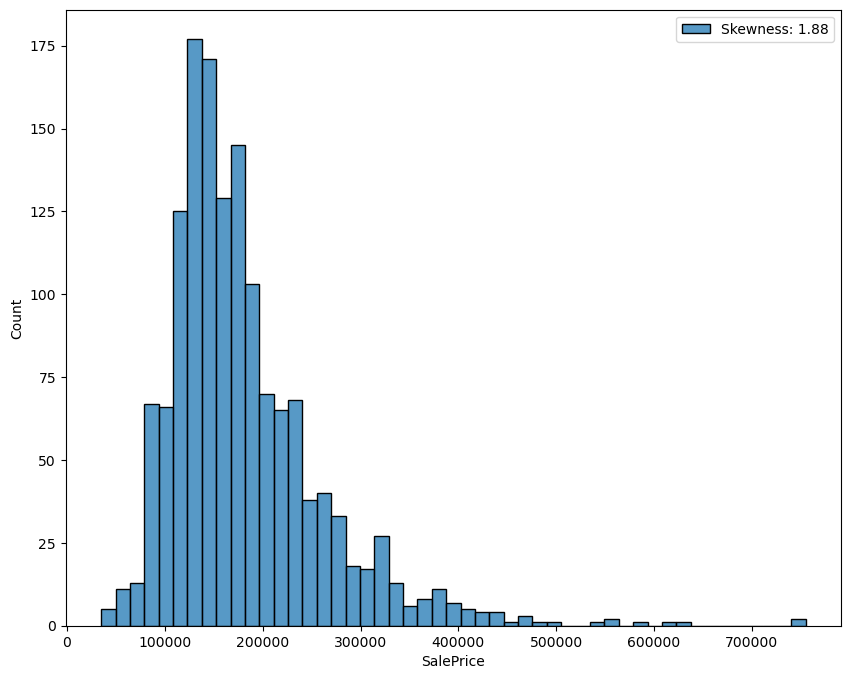

In [21]:


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
bar = sns.histplot(train["SalePrice"])
bar.legend(["Skewness: {:.2f}".format(train['SalePrice'].skew())])
plt.show()


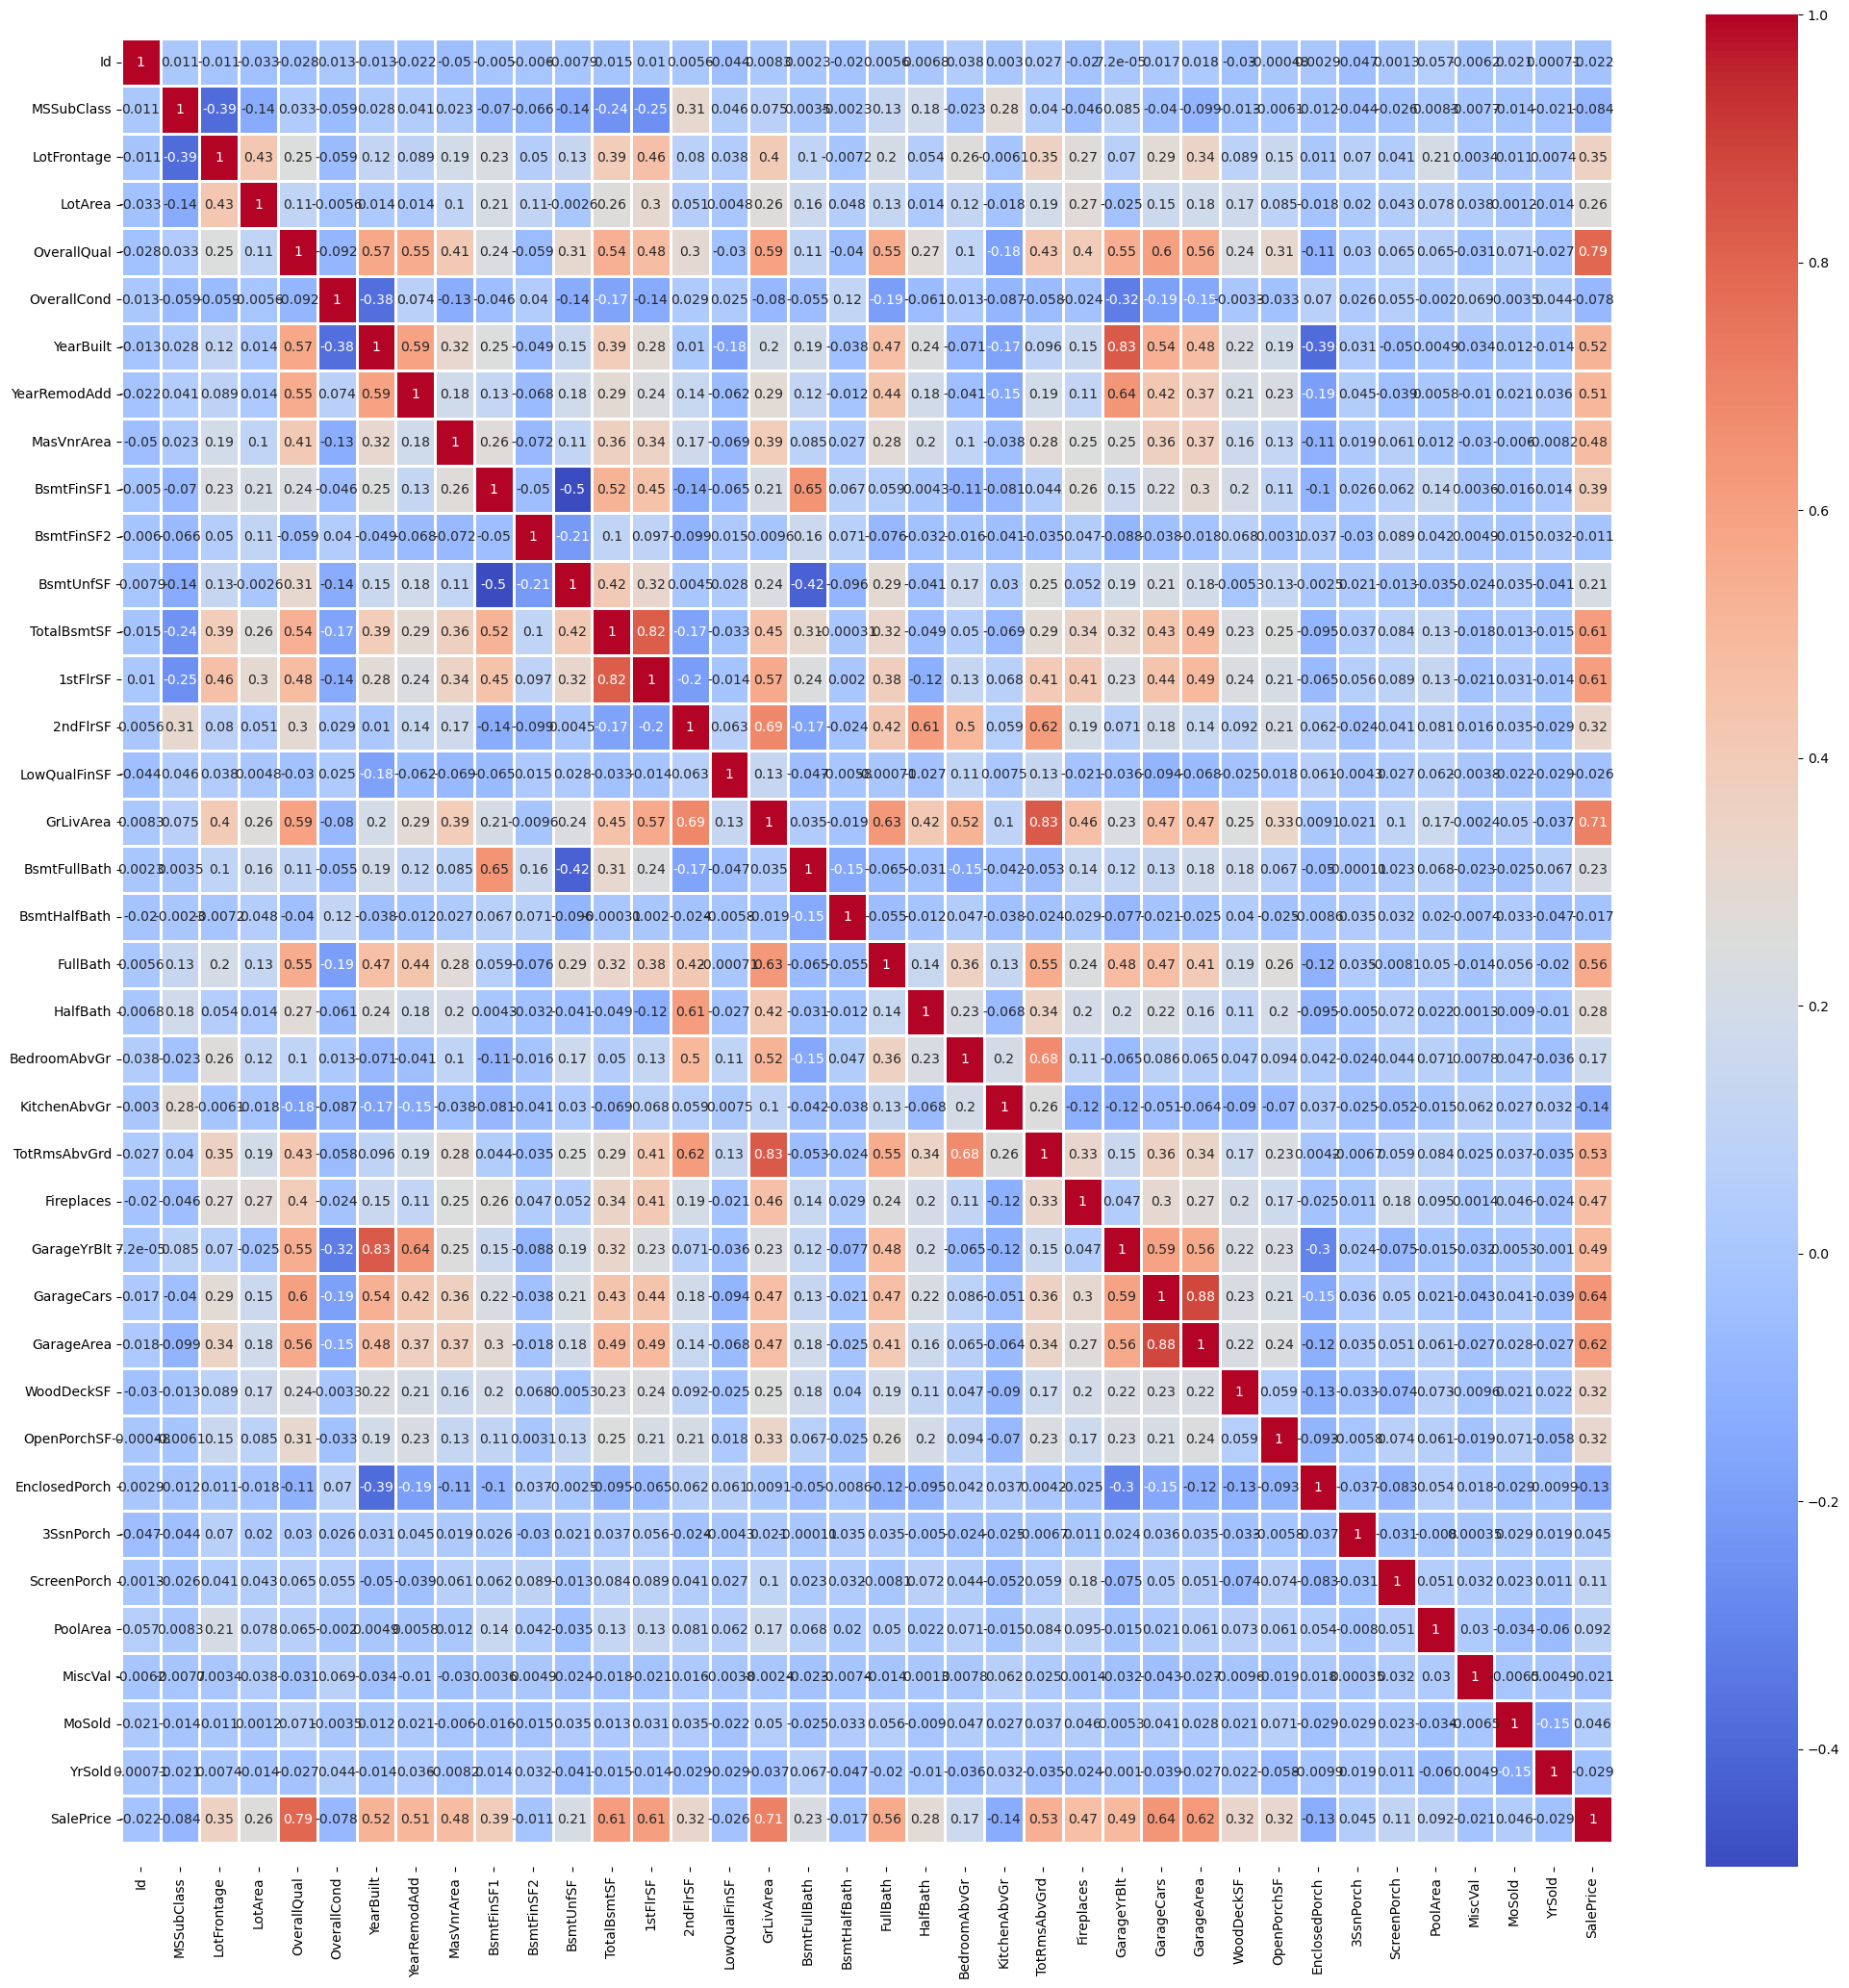

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numeric columns
numeric_train = train.select_dtypes(include=[float, int])

# Plot heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(numeric_train.corr(), cmap="coolwarm", annot=True, linewidths=2)

# Fixing the ylim issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Show plot
plt.show()


In [72]:
# correlation heatmap of highly correlated feature with SalePrice
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_train = train.select_dtypes(include=[float, int])

# Compute correlation matrix
hig_corr = numeric_train.corr()

# Select features highly correlated with SalePrice (absolute correlation >= 0.5)
high_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]
print(high_corr_features)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


In [76]:
# correlation heatmap of highly correlated feature with SalePrice
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_train = train.select_dtypes(include=[float, int])

# Compute correlation matrix
hig_corr = numeric_train.corr()

# Select features highly correlated with SalePrice (absolute correlation >= 0.5)
high_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

# Show the plot
plt.show()


TypeError: heatmap() missing 1 required positional argument: 'data'

<Figure size 1000x800 with 0 Axes>

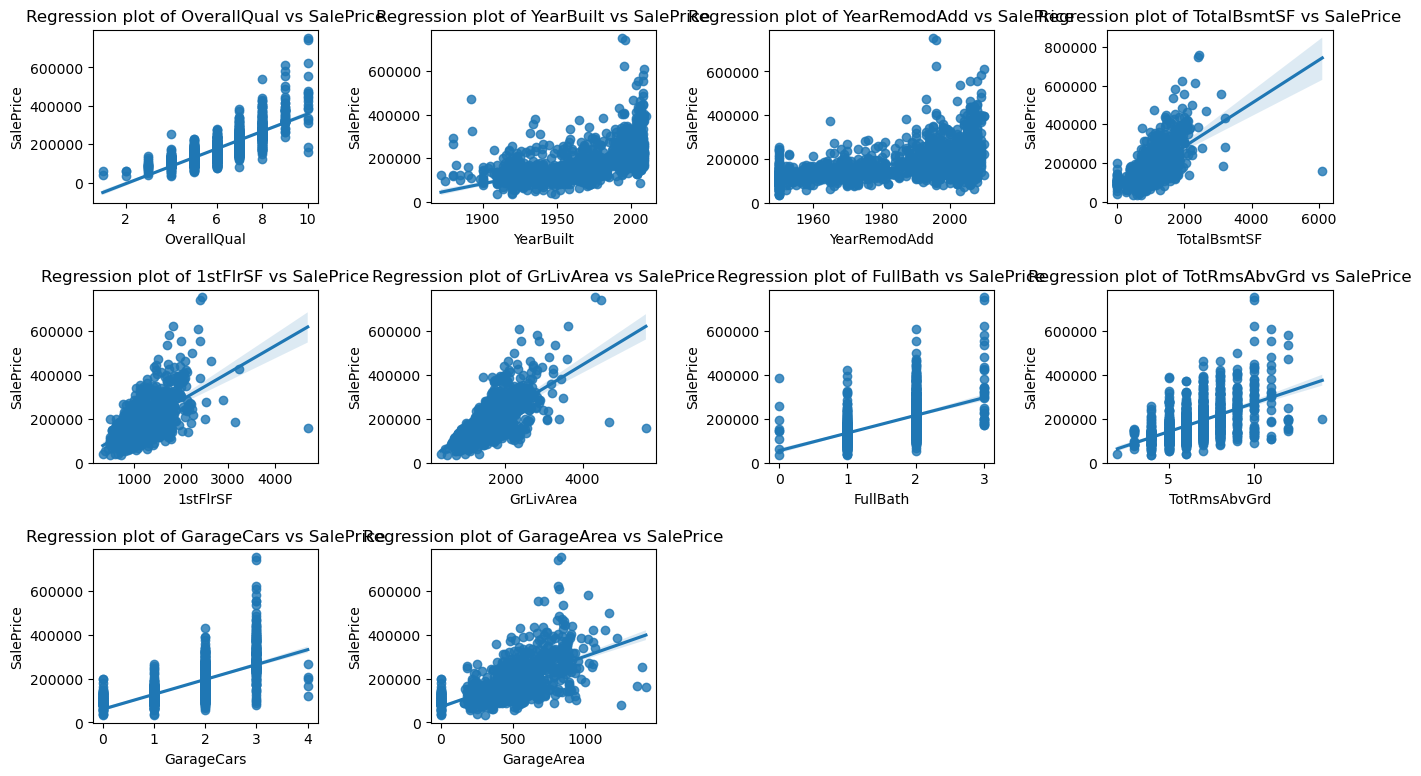

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(16, 9))

# Create regression plots for the first 10 highly correlated features
for i in range(len(high_corr_features)):
    if i < 10:  
        plt.subplot(3, 4, i + 1)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)  
        sns.regplot(x=high_corr_features[i], y='SalePrice', data=train)
        plt.title(f'Regression plot of {high_corr_features[i]} vs SalePrice')

# Show the plots
plt.show()


## Handling Missing Value


In [6]:
# Assuming 'train' is your DataFrame
import pandas as pd

train_data_path = r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\train.csv"
test_data_path = r"C:\Users\aishwarya amin\house-prices-advanced-regression-techniques\test.csv"
df = pd.read_csv(train_data_path)
df = pd.read_csv(test_data_path)
missing_col = df.columns[df.isnull().any()]
print(missing_col)


Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')


In [50]:
## Handling missing value of Bsmt feature
bsmt_col = ['BsmtCond','BsmtExposure','BsmtFinSF1','BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2','BsmtFullBath','BsmtHalfBath','BsmtQual','BsmtUnfSF', 'TotalBsmtSF']
bsmt_feat = df[bsmt_col]
print(bsmt_feat)


     BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
0          TA           No       468.0       144.0          Rec          LwQ   
1          TA           No       923.0         0.0          ALQ          Unf   
2          TA           No       791.0         0.0          GLQ          Unf   
3          TA           No       602.0         0.0          GLQ          Unf   
4          TA           No       263.0         0.0          ALQ          Unf   
...       ...          ...         ...         ...          ...          ...   
1454       TA           No         0.0         0.0          Unf          Unf   
1455       TA           No       252.0         0.0          Rec          Unf   
1456       TA           No      1224.0         0.0          ALQ          Unf   
1457       TA           Av       337.0         0.0          GLQ          Unf   
1458       TA           Av       758.0         0.0          LwQ          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQu

In [48]:
bsmt_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 27 to 1444
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtCond      4 non-null      object 
 1   BsmtExposure  5 non-null      object 
 2   BsmtFinSF1    48 non-null     float64
 3   BsmtFinSF2    48 non-null     float64
 4   BsmtFinType1  7 non-null      object 
 5   BsmtFinType2  7 non-null      object 
 6   BsmtFullBath  47 non-null     float64
 7   BsmtHalfBath  47 non-null     float64
 8   BsmtQual      5 non-null      object 
 9   BsmtUnfSF     48 non-null     float64
 10  TotalBsmtSF   48 non-null     float64
dtypes: float64(6), object(5)
memory usage: 4.6+ KB


In [16]:
bsmt_feat = bsmt_feat[bsmt_feat.isnull().any(axis=1)]
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
27,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1595.0,1595.0
125,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
133,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
269,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
318,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
354,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
387,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
388,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
396,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
397,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


In [54]:
bsmt_feat_all_nan = bsmt_feat[(bsmt_feat.isnull() | bsmt_feat.isin([0])).all(1)]
print(bsmt_feat_all_nan)

     BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
125       NaN          NaN         0.0         0.0          NaN          NaN   
133       NaN          NaN         0.0         0.0          NaN          NaN   
269       NaN          NaN         0.0         0.0          NaN          NaN   
318       NaN          NaN         0.0         0.0          NaN          NaN   
354       NaN          NaN         0.0         0.0          NaN          NaN   
387       NaN          NaN         0.0         0.0          NaN          NaN   
388       NaN          NaN         0.0         0.0          NaN          NaN   
396       NaN          NaN         0.0         0.0          NaN          NaN   
397       NaN          NaN         0.0         0.0          NaN          NaN   
398       NaN          NaN         0.0         0.0          NaN          NaN   
400       NaN          NaN         0.0         0.0          NaN          NaN   
455       NaN          NaN         0.0  

In [56]:
bsmt_feat_all_nan.shape

(42, 11)

In [40]:
qual = list(df.loc[:, df.dtypes == 'object'].columns.values)
print(qual)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [86]:
# Fill in the missing value in bmst features
import numpy as np
for i in bsmt_col:
    if i in qual:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan,'NA')
    else:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan,0)
bsmt_feat.update(bsmt_feat_all_nan)
df.update(bsmt_feat_all_nan)


C:\Users\aishwarya amin\AppData\Local\Temp\ipykernel_13328\2233049283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan,'NA')
C:\Users\aishwarya amin\AppData\Local\Temp\ipykernel_13328\2233049283.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan,0)


In [88]:
bsmt_feat = bsmt_feat[bsmt_feat.isin([np.nan]).any(axis=1)]
print(bsmt_feat)

     BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
27         TA          NaN         0.0         0.0          Unf          Unf   
580       NaN           Mn      1044.0       382.0          GLQ          Rec   
725       NaN           No      1033.0         0.0          BLQ          Unf   
757        Fa           No         0.0         0.0          Unf          Unf   
758        TA           No         0.0         0.0          Unf          Unf   
888        TA          NaN         0.0         0.0          Unf          Unf   
1064      NaN           Av       755.0         0.0          ALQ          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF  TotalBsmtSF  
27             0.0           0.0       Gd     1595.0       1595.0  
580            1.0           0.0       Gd        0.0       1426.0  
725            0.0           1.0       TA       94.0       1127.0  
757            0.0           0.0      NaN      173.0        173.0  
758            0.0 

In [90]:
bsmt_feat.shape


(7, 11)

In [92]:
print(df['BsmtFinSF2'].max())
print(df['BsmtFinSF2'].min())


1526.0
0.0


In [94]:
pd.cut(range(0,1526),5)  # create a bucker

[(-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], ..., (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0]]
Length: 1526
Categories (5, interval[float64, right]): [(-1.525, 305.0] < (305.0, 610.0] < (610.0, 915.0] < (915.0, 1220.0] < (1220.0, 1525.0]]

In [96]:
df_slice = df[(df['BsmtFinSF2'] >= 305) & (df['BsmtFinSF2'] <=610)]
print(df_slice)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
68    1529          20       RL         81.0     7635   Pave   NaN      IR1   
101   1562          20       RL         65.0     7800   Pave   NaN      Reg   
104   1565          60       RL         86.0    11227   Pave   NaN      Reg   
109   1570          20       RL         65.0    11479   Pave   NaN      Reg   
158   1619          20       RL         76.0    12887   Pave   NaN      Reg   
253   1714          20       FV         68.0     8736   Pave   NaN      IR1   
265   1726          60       RL         70.0     7703   Pave   NaN      Reg   
267   1728          60       RL         70.0     9109   Pave   NaN      Reg   
275   1736          20       RL         65.0     7150   Pave   NaN      Reg   
299   1760          20       RL         85.0     9350   Pave   NaN      Reg   
311   1772          20       RL         70.0     8750   Pave   NaN      Reg   
392   1853         120       RL         42.0     423

In [102]:
bsmt_feat.at[333,'BsmtFinType2'] = df_slice['BsmtFinType2'].mode()[0]   # replace NAN value of  BsmtFinType2
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
27,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1595.0,1595.0
580,NaN,Mn,1044.0,382.0,GLQ,Rec,1.0,0.0,Gd,0.0,1426.0
725,NaN,No,1033.0,0.0,BLQ,Unf,0.0,1.0,TA,94.0,1127.0
757,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,173.0,173.0
758,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,356.0,356.0
888,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,725.0,725.0
1064,NaN,Av,755.0,0.0,ALQ,Unf,0.0,0.0,TA,240.0,995.0
333,NaN,NaN,NaN,NaN,NaN,Rec,NaN,NaN,NaN,NaN,NaN


In [130]:
df.update(bsmt_feat)
bsmt_feat.isnull().sum()

BsmtCond    0
BsmtQual    0
dtype: int64

In [134]:
bsmt_feat['BsmtCond'] = bsmt_feat['BsmtCond'].replace(np.nan,df['BsmtCond'].mode(33)[0])
bsmt_feat['BsmtQual'] = bsmt_feat['BsmtQual'].replace(np.nan,df['BsmtQual'].mode(44)[0])
print(bsmt_feat['BsmtCond'])
print(bsmt_feat['BsmtQual'])

0    TA
1    Gd
2    TA
3    TA
4    TA
5    Fa
Name: BsmtCond, dtype: object
0    Gd
1    Gd
2    TA
3    Gd
4    TA
5    Gd
Name: BsmtQual, dtype: object


## Handling missing value of Garage feature

In [185]:
# Check for columns with missing values
print(df.columns[df.isnull().any()])

# Define the list of expected garage-related columns

# Check which columns from garage_col are missing in the DataFrame
missing_cols = [col for col in garage_col if col not in df.columns]
if missing_cols:
    print(f"These columns are missing from the DataFrame: {missing_cols}")
else:
    # Proceed with selecting garage-related columns that are present
    garage_feat = df[garage_col]
    
    # Filter rows where any of the selected columns have NaN values
    garage_feat = garage_feat[garage_feat.isnull().any(axis=1)]
    print(garage_feat)


Index([], dtype='object')
These columns are missing from the DataFrame: ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']


In [187]:
df.update(bsmt_feat)
bsmt_feat.isnull().sum()

BsmtCond    0
BsmtQual    0
dtype: int64

In [177]:
df.columns[df.isnull().any()]

Index([], dtype='object')